<h1 style="color:rgb(0,120,170)">Assignment 6: Logistic Regression</h1>

<h2 style="color:rgb(0,120,170)">Copyright and Fair Use</h2>

This material, no matter whether in printed or electronic form,
may be used for personal and non-commercial educational use
only. Any reproduction of this material, no matter whether as a
whole or in parts, no matter whether in printed or in electronic
form, requires explicit prior acceptance of the authors.

<h2 style="color:rgb(0,120,170)">Automatic Testing Guidelines</h2>

Automatic unittesting requires you to submit a notebook which contains strictly defined objects.
Strictness of definition consists of unified shapes, dtypes, variable names and more.

Within the notebook, we provide detailed instruction which you should follow in order to maximise your final grade.

**Name your notebook properly**, follow the pattern in the template name:

**Assignment_N_NameSurname_matrnumber**
<ol>
    <li>N - number of assignment</li>
    <li>NameSurname - your full name where every part of the name starts with a capital letter, no spaces</li>
    <li>matrnumber - you student number on ID card (without k, potenitially with a leading zero)</li>
</ol>

Don't add any cells but use the ones provided by us. You may notice that all cells are tagged such that the unittest routine can recognise them. Before you sumbit your solution, make sure every cell has its (correct) tag!

You can implement helper functions where needed unless you put them in the same cell they are actually called. Always make sure that implemented functions have the correct output and given variables contain the correct data type. In the descriptions for every function you can find information on what datatype an output should have and you should stick to that in order to minimize conflicts with the unittest. Don't import any other packages than listed in the cell with the "imports" tag.

Questions are usually multiple choice (except the task description says otherwise) and can be answered by changing the given variables to either "True" or "False". "None" is counted as a wrong answer in any case!

**Note:** Never use variables you defined in another cell in your functions directly; always pass them to the function as a parameter. In the unitest, they won't be available either. If you want to make sure that everything is executable for the unittest, try executing cells/functions individually (instead of running the whole notebook).

In [1]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib
import matplotlib.pyplot as plt

<h2 style="color:rgb(210,90,80)">Task 1:</h2>

The goal of this exercise is to implement logistic regression from scratch using only numpy. Start with the following tasks:

* Implement the formula for the gradient computed in the lecture. In particular you should implement a function 
`logistic_gradient(w, x, y)` that takes a parameter vector
$\mathbf{w}$, a data matrix $\mathbf{X}$ and a label vector
$\mathbf{y}$ and returns the gradient $\frac{\partial L}{\partial
\mathbf{w}}$, where $L$ is the negative log-likelihood for the Bernoulli distribution, i.e. the cross-entropy loss.

* Implement a function `cost(w, x, y)`, that takes the same parameters but returns the cross-entropy loss.

* Test whether the gradient calculated by `logistic_gradient(w, x, y)` is correct via Gradient Checking. To do so, implement
a function `numerical_gradient(w, x, y)` that takes the same parameters
as `logistic_gradient`, but calculates the gradient numerically via the central difference quotient, using $\epsilon = 10^{-4}$ as suggested in the lecture slides.

* Implement the function `generate_random(nr_samples, nr_features)` that generates a random data matrix consisting of 5 data points with 10 features drawn from a standard normal distribution as well as corresponding random binary labels and a random weight vector, whose entries again stem from the standard normal distribution.  Hint: to generate the distributions use `np.random.normal` and `np.random.randint`.

* Implement the function `comparison(grad_a,grad_n)` that takes the analytical and the numerical gradient as inputs respectively. The function should check whether the two vectors deviate more than $\epsilon = 10^{-7}$ or not from each other (they shouldn't ;) )


<h3 style="color:rgb(210,90,80)">Code 1.1 (5 points):</h3>

In [2]:
"""
Function that computes the logistic gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output gradient, np array, gradient vector
"""
def logistic_gradient(w, x, y):
    # def sig(z):
    #     return (1 / (1 + np.exp(-z)))
    s = np.exp(-np.dot(x, w.T))
    gradient = np.dot(((1 / (1 + s)) - y), x)
    return gradient

<h3 style="color:rgb(210,90,80)">Code 1.2 (5 points):</h3>

In [3]:
"""
Function that computes the cross-entropy loss
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output loss, float, cross-entropy loss
"""
def cost(w, x, y):
    # def sig(z):
    #     return (1 / (1 + np.exp(-z)))
    loss = 0
    for i in range(len(y)):
        sig_i = 1 / (1 + np.exp(-np.dot(x[i,:], w.T)))
        loss -= ((y[i] * np.log(sig_i)) + ((1 - y[i]) * np.log(1 - sig_i)))
    return loss

<h3 style="color:rgb(210,90,80)">Code 1.3 (10 points):</h3>

In [4]:
"""
Function that computes the numerical gradient
@param w, np array, weights
@param x, np array, data matrix
@param y, np array, data labels

@output dw, np array, numerical gradient
"""
def numerical_gradient(w, x, y):
    e = 1e-4
    e_diag = np.identity(len(w))
    dw = np.zeros_like(w)
    for i in range(len(w)):
        _e = e * e_diag[i]
        dw[i] = (cost(w + _e, x, y) - cost(w - _e, x, y)) / (2 * e)
    return dw

<h3 style="color:rgb(210,90,80)">Code 1.4 (10 points):</h3>

In [5]:
"""
Function that generates a random matrix X and the random vectors y and weights
@param nr_samples, int, the number of samples you should generate
@param nr_features, int, the number of feature each sample has

@output X_random, np array, random samples
@output y_random, np array, random targets
@output w_random, np array, random weights
"""
def generate_random(nr_samples, nr_features):
    X_random = np.random.normal(size=(nr_samples, nr_features))
    w_random = np.random.normal(size=nr_features)
    y_random = np.random.randint(0,2,nr_samples)    
    return X_random, y_random, w_random

<h3 style="color:rgb(210,90,80)">Code 1.5 (10 points):</h3>

In [6]:
"""
Function that compares two array 
@param grad_a, np array, the analytical gradient
@param grad_n, np array, the numberical gradient

@output close, bool , True if the arrays are similar, False if they are not
"""
def comparison(grad_a,grad_n):
    e = 1e-7
    close = np.allclose(grad_a, grad_n, atol=e)
    return close

In [7]:
#Nothing to do here, if you did everything correctly you can just run this code and should see the correct results
n = 5
d = 10
X_random, y_random, w_random = generate_random(n,10)
analytical_gradient = logistic_gradient(w_random,X_random,y_random)
num_gradient = numerical_gradient(w_random,X_random,y_random)
comparison_result = comparison(analytical_gradient, num_gradient)
print("X =",X_random,"\n")
print("y =",y_random,"\n")
print("w = ",w_random,"\n")
print("Logistic gradient:\n",analytical_gradient,"\n")
print("Numerical gradient:\n", num_gradient, "\n")
print("Vectors within absolute tolerance of 10^-7: ",comparison_result)

X = [[ 0.77075485  0.31030116 -0.86104696 -1.14794338 -0.36739127 -1.16208169
   0.4286573  -1.00007313 -1.12790759  0.29978642]
 [-0.38004709 -1.39701346 -0.9307617  -0.58500089  1.55449924  0.33609293
  -0.87022929  0.87717132  1.58816872  0.22644606]
 [-1.1295493  -0.7563453   0.35560491 -0.04771062 -2.43709652  0.89137851
  -0.58295674 -0.08755803  1.14186853 -0.15786789]
 [-0.97839562  0.57695968 -1.20907169 -0.38604095 -1.35282901 -0.59806227
  -0.47309274  0.54167515  1.04169777  0.72043001]
 [-1.63878176 -0.18323971  0.35474526 -0.77734592  0.64850722 -0.27512938
   0.1058812  -0.8675752   0.19180089 -0.9092286 ]] 

y = [1 0 1 0 0] 

w =  [-1.20617859 -0.68081747  1.76074003  1.44043121  1.03633308  0.89142907
 -0.15782521  0.49511731 -0.69574697 -0.23431948] 

Logistic gradient:
 [-1.80594971 -0.8631457   0.43924972  0.17974088  2.99118704  0.66121729
 -0.54129815  0.81075223  1.61913961 -0.84796776] 

Numerical gradient:
 [-1.80594971 -0.8631457   0.43924972  0.17974088  2.99

Next we intend to apply logistic regression on a real data set.

* Implement a function `fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=1e5)` that uses Logistic Regression with Gradient Descent to train classifiers on the training set. Use randomly initialized weights, drawn from a uniform distribution between $-1$ and $1$, a learning rate $\eta$ (eta) of $10^{-4}$ and a maximum number of iterations of $1e5$. Furthermore the algorithm should stop if the difference between the loss of the last iteration step and the current loss is less than $\eta$. Store all the losses in a list to have some insights in the learning procedure later on. Also print the losses in $1000$ step intevals. The function should return the model weights and the list containing all the losses.
* Furthermore, implement a function `predictLogReg(w, x)` that returns the prediction for the given parameter vector $\mathbf{w}$ and feature vector $\mathbf{x}$.

Hint: for intialization use `np.random.uniform`.

<h3 style="color:rgb(208,90,80)">Code 1.6 (25 points)</h3>


In [8]:
"""
Function that fits a logistic regression model to given dat
@param x_train, np array, training data
@param y_train, np array, training samples

@output w, np array , the final weight array
@output losses, list , list holding all the losses from the training (including the loss before the training)
"""
def fitLogRegModel(x_train, y_train, eta=1e-4, max_iter=100000):
    w = np.random.uniform(low=-1, high=1, size=x_train.shape[1])
    losses = []
    for i in range(max_iter):
        w_prev = w
        w = w_prev - eta * logistic_gradient(w_prev, x_train, y_train)
        loss = cost(w, x_train, y_train)
        losses.append(loss)
        if i > 2 and abs(losses[-2] - loss) < eta:
            return w, losses
        if i % 1000 == 0:
            print(i, losses[-1])
    return w, losses

<h3 style="color:rgb(208,90,80)">Code 1.7 (5) points)</h3>


In [9]:
"""
Function that calculates the prediction for one or more new samples
@param w, np array, weights
@param x, np array, samples for inference

@output prediction, np array, the calculated predictions
"""
def predictLogReg(w, x):
    prediction = np.dot(x, w.T)
    return prediction

Now we fit the logistic regression model from above to the training data and print the parameters for the test data.

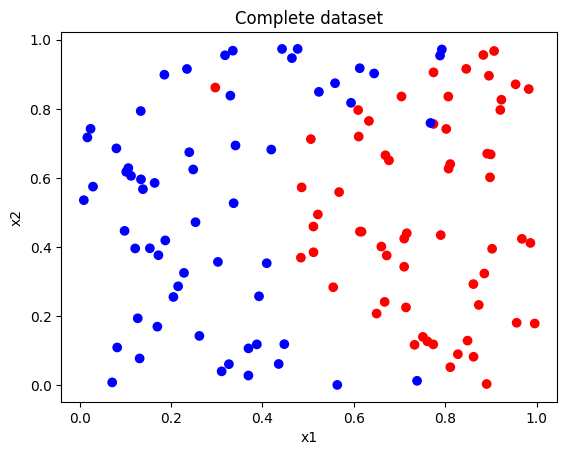

In [10]:
#nothing to do here

from sklearn.utils import shuffle
# Read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet_LR_a.csv', delimiter=',',skip_header=1)
X, y = Z[:,:-1], Z[:,-1]
X = np.hstack((np.ones((X.shape[0],1)),X))   #prepend ones for intercept

# Plot data distribution
color= ['red' if elem==1 else 'blue' for elem in y ]
plt.scatter(X[:,-2], X[:,-1], c=color)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Complete dataset')
# Split into test and training set
X_train=X[:int(X.shape[0]/2)]
X_test=X[int(X.shape[0]/2):]
y_train=y[:int(len(y)/2)]
y_test=y[int(len(y)/2):]

In [11]:
#nothing to do here - just execute the cell
w_learned,losses=fitLogRegModel(X_train, y_train)
pred_train=predictLogReg(w_learned, X_train) #as a check
pred_test=predictLogReg(w_learned, X_test)
print("The learnt weights are: w =",w_learned)

0 57.86854379218754
1000 40.29362511080828
2000 37.046503242248384
3000 34.50699745752214
4000 32.42105176523343
5000 30.692515337787004
6000 29.247540199326497
7000 28.02906474812267
8000 26.99298662363428
9000 26.105070173180053
10000 25.33855999920489
11000 24.672380539162063
12000 24.08979013263043
13000 23.57737643041103
14000 23.12430446286301
15000 22.721750798093797
16000 22.362474836833368
17000 22.040491554481086
18000 21.750819718831643
19000 21.489286643233044
20000 21.252375599849096
21000 21.037105667583354
22000 20.840936428032162
23000 20.661691840269114
24000 20.497499027011933
25000 20.34673873632654
26000 20.20800500752491
27000 20.080072140485367
28000 19.96186749646871
29000 19.85244898306619
The learnt weights are: w = [-2.16804134  6.14885386 -1.41423943]


Text(0.5, 1.0, 'Test dataset - predictions')

<Figure size 640x480 with 0 Axes>

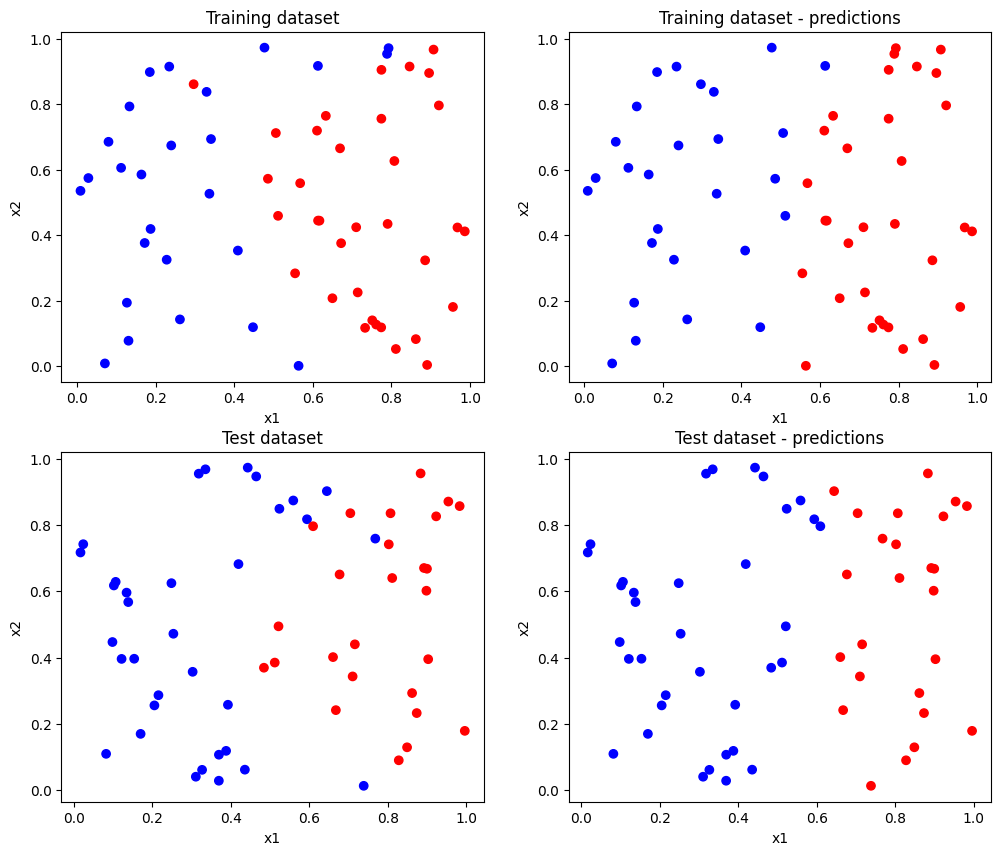

In [12]:
# Nothing to do here
# Plot training and test dataset
# Plot predictions for training and test dataset

fig = plt.figure()
fig = plt.figure(figsize = (12,10))
plt.subplot(2, 2, 1)
color= ['red' if elem>0.5 else 'blue' for elem in y_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset')

plt.subplot(2, 2, 2)
color= ['red' if elem>0.5 else 'blue' for elem in pred_train ]
plt.scatter(X_train[:,-2], X_train[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Training dataset - predictions')

plt.subplot(2, 2, 3)
color= ['red' if elem>0.5 else 'blue' for elem in y_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset')

plt.subplot(2, 2, 4)
color= ['red' if elem>0.5 else 'blue' for elem in pred_test ]
plt.scatter(X_test[:,-2], X_test[:,-1], c=color,label='the data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Test dataset - predictions')

In the following cell the data set `DataSet_LR_a.csv` is loaded§and split into a training set and a test set ($50\,\%$ each). Now you should:
* Classify samples as class `1` if the Logistic Regression returns values $\geq 0.5$ and `0` otherwise. Calculate  the entries for a confusion matrix and from these values the Accuracy and Balanced Accuracy in the function `calc_acc(prediction, true_values, threshold)` and apply it on the training and on the test sets.
* Provide ROC curves of the classifiers on the test samples and compute the corresponding AUC. Hint: the functions `roc_curve` and `auc` from `sklearn.metrics` might be useful. Make sure to store the calculated value for the AUC in the variable `rocAUC` - this is important for the unit-test.

<h3 style="color:rgb(208,90,80)">Code 1.8 (25 points)</h3>


In [22]:
"""
Function that calculates the prediction for one or more new samples
@param prediction, np array, predicted values
@param true_values, np array, ground truth

@output pos, float, positive samples 
@output neg, float, negative samples 
@output tp, float, true positive samples 
@output tn, float, true negative samples 
@output fp, float, false positive samples 
@output fn, float, false negative samples 
@output acc, float, accuracy
@output balanced_acc, float, balanced accuracy
"""
def calc_acc(prediction, true_values, threshold = 0.5):
    pred = np.asarray([prediction >= threshold]).T.astype(float)

    pos = np.sum(true_values == 1)
    neg = np.sum(true_values == 0)
    
    tp = np.sum((pred == 1) & (true_values == 1))
    tn = np.sum((pred == 0) & (true_values == 0))
    fp = np.sum((pred == 1) & (true_values == 0))
    fn = np.sum((pred == 0) & (true_values == 1))
    
    TPR = tp / pos
    TNR = tn / neg
    
    acc =  (tp + tn) / (tp + tn + fp + fn)
    balanced_acc = (TPR + TNR) / 2
    return pos, neg, tp, tn, fp, fn, acc, balanced_acc


In [23]:
# Calculate accuracy and balanced accuracy for test set

result_train = calc_acc(pred_train, y_train)
result_test = calc_acc(pred_test, y_test)
print(result_train[-2])
print(result_train[-1])
print(result_test[-2])
print(result_test[-1])

0.5066666666666667
30.0
0.5111111111111111
30.0


<h3 style="color:rgb(208,90,80)">Code 1.9 (5 points)</h3>


0.9671945701357466


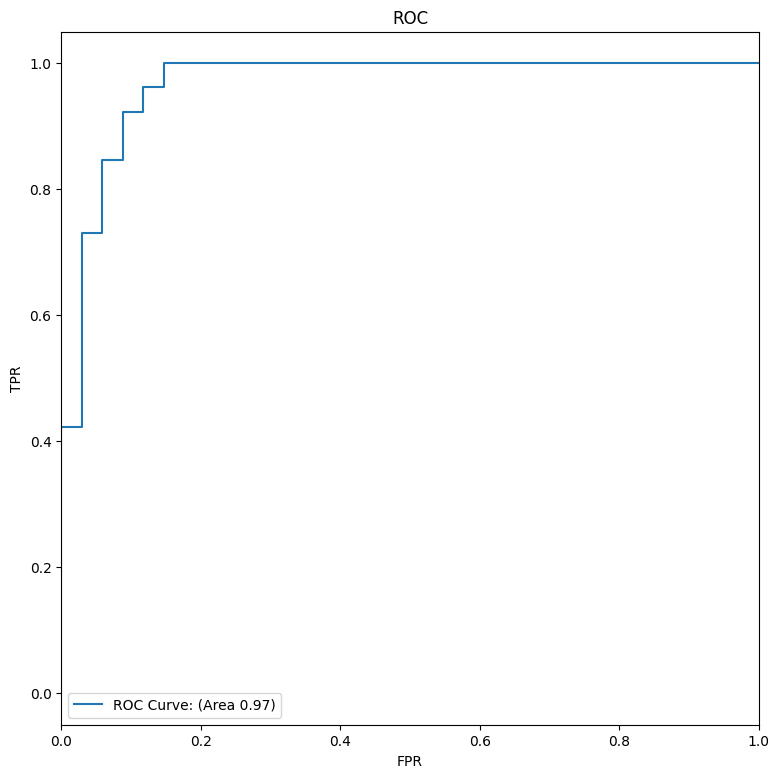

In [15]:
fpr, tpr, _ = roc_curve(y_test, pred_test)

rocAUC = auc(fpr, tpr)
print(rocAUC)

fig = plt.figure(figsize=(9, 9))
plt.title('ROC')
plt.plot(fpr, tpr, label=f'ROC Curve: (Area {rocAUC:.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.margins(x=0)
plt.show()